# Physics 515 assignment 1
Brittany Howard

Due 12 october, 1pm.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

%matplotlib inline

from sympy import init_printing
init_printing() 

# Question 1

* Derive  $g(y)$, the pdf for the random variable, $Y$, formed by the sum of independent random variables, $X$ which follows the uniform distribution [0, $d$] and $T$ which follows the exponential distribution, with mean lifetime $\tau = 1$. 

Okay, so we know that $Y = X + T$, and so $Y$ is the result of a convolution of $X$ and $T$. 

If $Y$ produces outcomes in the range $[y, y+dy]$, we can note that $t=y-x$ and say (pg 66):

$P(y<Y<y+dy)=h(y)dy=\bigg(\int_{-\infty}^\infty h(x, y-x)dx\bigg)dy$.

I find it less confusing to relabel the random variables' pdfs as $f_x(x)$,  $f_y(y)$, and $f_z(z)$, so that now we are searching for $f_y(y)$.

Since $X$ and $T$ are independent, we can separate the expression above and write the following (pg 66):

$f_y(y) = \int_{-\infty}^\infty f_x(y-t)f_t(t)dt$.

So now we have to ask what are $f_x(y-t)$ and $f_t(t)$? Since $X$ follows a uniform distribution, we can use the following:

$f(x|a,b) = \frac{1}{b-a}$ where $a\leq x \leq b$ and $f(x|a,b)=0$ elsewhere.

For this particular case, $a = 0$ and $b = d$, so we can write (pg 97):

$f(x|0,d) = \frac{1}{d}$ where $0\leq x \leq d$

and $f(x|0,d) = 0$ everywhere else.

Now what is $f_t(t)$? It would be an exponential distribution with $\tau=1$. In math, it would look like (pg 99):

$f_t(t|\tau=1)= e^{-t}$ for $t \geq 0$

and $f_t(t|\tau=1)= 0$ for $t < 0$.

So now we have everything we need to write the expression for $f_y(y)$, and we just need to think about the bounds of our integral. This is easiest if we draw a little plot to show which regions we want to consider. 

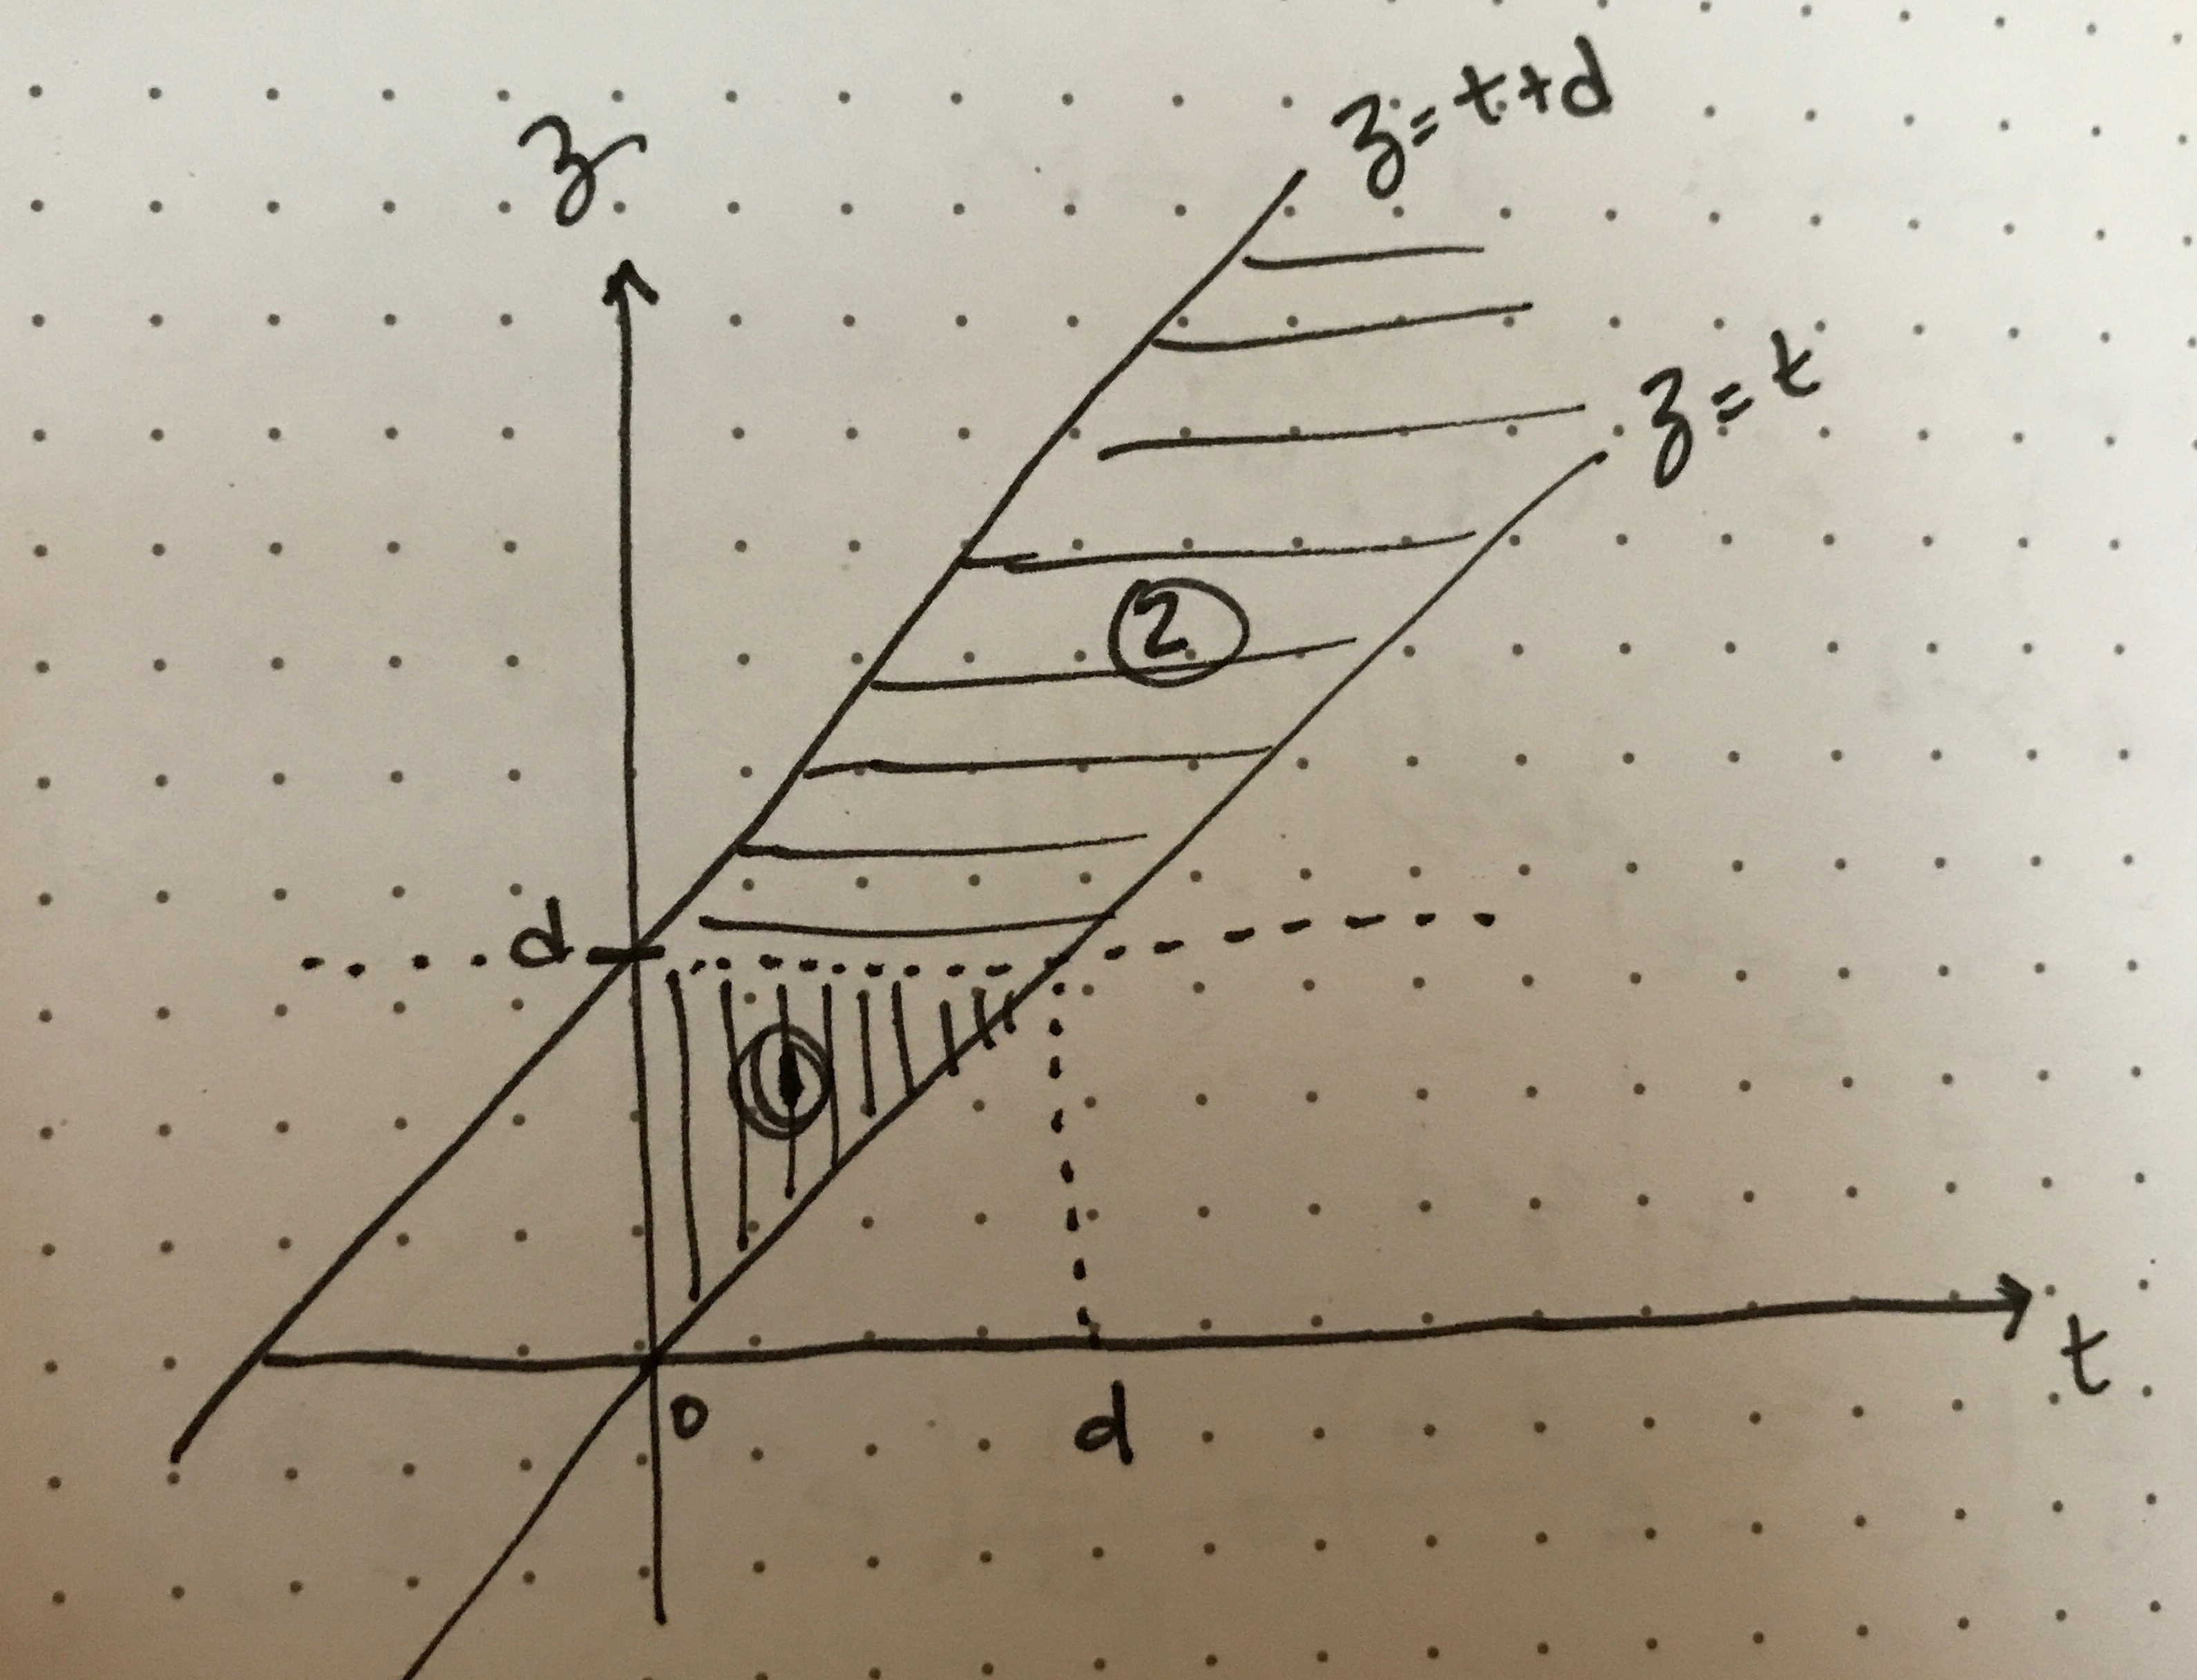
    
We see that region one encompasses $0\leq y \leq d$, and the integral we need to solve for this region is 
    

$f_y(y) = \int_{0}^y \frac{e^{-t}}{d} dt$.

Evaluating, we see that $f_y(y) = \frac{1-e^{-y}}{d}$ in region one.

Now we consider the second region, where $d\leq y < \infty$. We perform the following integral:

$f_y(y) = \int_{y-d}^\infty \frac{e^{-t}}{d} dt$, 

and upon evaluating see that $f_y(y) = \frac{e^{d-y}-e^{-y}}{d}$ in region two.

Where $y < 0$, we know that  $f_y(y) = 0$.



# Question 2 

* Calculate the expectation value of $Y$, analytically, using $g(y)$. As a cross check, calculate this again using the expectation values of 
$X$ and $T$. Find the variance of $Y$ (method is up to you).


I'll start by finding the expectation value analytically. The expectation value of random variable $X$ is defined as (pg 53):

$E[X] = \int_{-\infty}^{\infty}xf_x(x)dx = \mu_x$.

So in the case of $Y$, we have:

$E[Y] = \int_{-\infty}^{\infty}yf_y(y)dy = \mu_y$.

Unlike in the last section, it doesn't make sense to break into two regions; rather, we need to comine (by adding?) the two pdfs because we are performing an integral (so, summing) from $-\infty$ to $\infty$. Because $Y=0$ when $y<0$, we can neglect that region, but we have to consider everywhere else. 

So, the pdf f_y(y) that we want to consider is differen





Let's check by adding the expectation values of $X$ and $T$. Becuase we are adding two independent random variables to create a new random variable, we can do that. In math, 

$E[Y] = E[X] + E[T]$.

So what is $E[X]$? Because $X$ follows the uniform distribution with $a=0$ and $b=d$, we know that (pg 97)

$E[X] = \frac{1}{2}(0+d) = \frac{d}{2}$.

And now we ask what is $E[T]$? Because $T$ follows an exponential distribution with $\tau=1$, we know that (pg 99) 

$E[T] = \tau = 1$

So the expectation value we are looking for should be given by

$E[Y] = E[X] + E[T] = 1 + \frac{d}{2}$ 

in spaces where $0\leq y$, and it should be equal to $0$ elsewhere. This makes good common sense.

Now I'll look for the variance of $Y$. We know that $V_Y=E[Y^2]-E[Y]^2$. Given our result for $E[Y]$ as calculated as above, we only need to calculate $E[Y^2]$ now, and we will have everything we need. 

# come back- fix expectation values and solve for variances-- have to add and solve, should only do one total region!

# Question 3
Generate a data set of 4000 outcomes of  $Y$, by adding computer-generated random numbers, and using   $d= 4$. Bin the data into bins of size 0.5 with a bin boundary at  $y = 0$ and extending to  $y = 10$. Plot the histogram showing the 4000 outcomes, and  overlay the pdf,  $g(y)$ with the correct scaling factor to be able to make a direct comparison. 

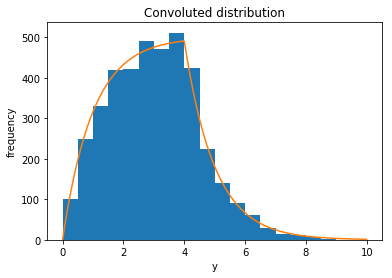

In [61]:
d = 4
X = np.random.uniform(low=0, high=d, size=4000)  # uniform distribution
T = np.random.exponential(scale=1.0, size=4000)  # exponential distribution
Y = X + T  # convolution result

bin_num = int(10/0.5)  # get number of bins

# add the pdf on top
y_reg1 = np.arange(0, d, .01)
y_reg2 = np.arange(d+.01, 10, .01)
pdf_reg1 = []
pdf_reg2 = []

for y in y_reg1:
    pdf_reg1.append((1 - np.exp(-y)) / d) # where 0 <= y <= d
    
for y in y_reg2:
    pdf_reg2.append((np.exp(d-y) - np.exp(-y)) / d)  # where y >= d
    
# scale pdf for the number of trials 
pdf = np.append(pdf_reg1, pdf_reg2)
pdf = pdf * 2000

plt.hist(Y, bins=bin_num, range=(0,10))
plt.plot(np.append(y_reg1, y_reg2), pdf)
plt.xlabel('y')
plt.ylabel('frequency')
plt.title('Convoluted distribution')

# Question 4
Evaluate the sample mean, $m$, and sample variance and compare these to the values found in part (2). The sample mean, $m$, is not exactly the expectation value; rather it is an outcome of a random variable, $M$. What are the properties of $M$? What is the probability that a sample mean would be as far (or farther) from the expectation value, than $m$?

First I will get the sample mean and variance:

In [65]:
sample_mean = np.mean(Y)
sample_variance = np.var(Y)
print('sample mean: {}\nsample variance: {}'.format(sample_mean, sample_variance))

sample mean: 3.027293966296349
sample variance: 2.2239119797730127


## todo: compare to the values from part 2

What are the properties of M? It can be completely described by its pdf. Does it look like any of the special pdfs we studied in class? 

We can use the central limit theorum. It says that for any random variable, regardless of its pdf shape, as the number of outcomes approaches infinity, ** the sampling distribution of the mean will become increasinly close to a Gaussian distribution!** The Gaussian distribution will have mean $\mu$ and variance $\frac{\sigma}{\sqrt{n}}$. So in math, we can say the following:

$M \approx G\bigg(\mu, \frac{\sigma}{\sqrt{n}}\bigg)$.


$\mu$ will be given by the expectation value $E[Y]$ calculate in part 2. The variance $\frac{\sigma}{\sqrt{n}}$ will also be equal to the corresponding value calculated in part 2.

## todo: plug in numbers from part 2 to get the actual values of the gaussian

What is the probability that a sample mean would be as far (or farther) from the expectation value, than $m$? For this, we need to do some frequentist hypothesis testing. We need to find the P-value, which is defined as "the probability of measuring data as anomalous or more anomalous than the data observed" (pg 150).

Step 1 is to define the null hypothesis $H_0$. Here, we will say that it is the hypothesis that our pdf for $Y$ is true and would give a value for the population mean equal to the one we obtained. 

We know that the expression for P-value is as follows (pg 152):

$p = \int_{m_{obs}}^{\infty}M(m|H_0)dm$.

From our calculations in part 3, we obtained $m_{obs} = 3.027$. We know that $M(m|H_0)$ will be given by $M \approx G\bigg(\mu, \frac{\sigma}{\sqrt{n}}\bigg)$.

Plugging in our values for expectation value and variance as determined in part 2, we obtain

## todo: put in number from part 2 to get the integral

We can then evaluate this integral in order to obtain our p-value.

In [67]:
# fill in values
m_obs, m = sp.symbols('m_obs, m')
sigma = 
n = 
mu = 

## TODO: FILL IN EQT WITH REAL VALUES FROM ABOVE
p_value = sp.integrate(eqt, (m, m_obs, sp.oo))

print('p_value: ')
p_value